# Generating the illustrations for the AUC and r2 distributions

In [45]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb

from config import figure_dir, data_dir

In [46]:
data = pd.read_csv(os.path.join(data_dir, 'evaluation_dtc.csv'))
data = data[(data['mode'] == '<=') & (data['name'] == 'appendicitis')]

dtc = data['auc']

data = pd.read_csv(os.path.join(data_dir, 'evaluation_rfc.csv'))
data = data[(data['mode'] == '<=') & (data['name'] == 'appendicitis')]

rfc = data['auc']

data = pd.read_csv(os.path.join(data_dir, 'evaluation_dtr.csv'))
data = data[(data['mode'] == '<=') & (data['name'] == 'real_estate_valuation')]

dtr = data['r2']

data = pd.read_csv(os.path.join(data_dir, 'evaluation_rfr.csv'))
data = data[(data['mode'] == '<=') & (data['name'] == 'real_estate_valuation')]

rfr = data['r2']


In [47]:
sb.set(rc={'figure.figsize':(3.5,3.5)})
sb.set_theme(style='white')

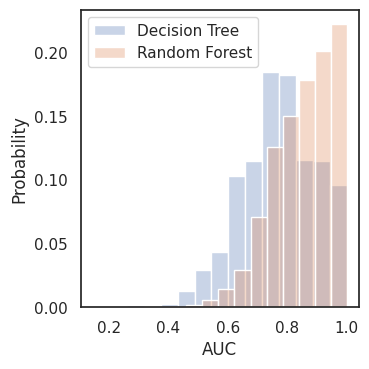

In [48]:
fig, ax = plt.subplots()
sb.histplot(x=dtc, stat='probability', alpha=0.3, bins=15, label='Decision Tree')
sb.histplot(x=rfc, stat='probability', alpha=0.3, bins=15, label='Random Forest')
ax.set_xlabel('AUC')
ax.legend()
ax.set_rasterized(True)
plt.tight_layout(pad=0.02)
plt.savefig(os.path.join(figure_dir, 'hist-clas.eps'), dpi=500)


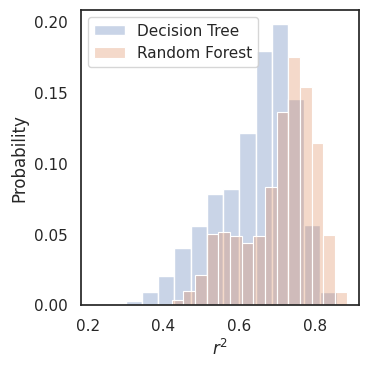

In [49]:
fig, ax = plt.subplots()
sb.histplot(x=dtr, stat='probability', alpha=0.3, bins=15, label='Decision Tree')
sb.histplot(x=rfr, stat='probability', alpha=0.3, bins=15, label='Random Forest')
ax.set_xlabel('$r^2$')
ax.legend()
plt.yticks([0.0, 0.05, 0.1, 0.15, 0.2])
ax.set_rasterized(True)
plt.tight_layout(pad=0.02)
plt.savefig(os.path.join(figure_dir, 'hist-reg.eps'), dpi=500)

<Axes: xlabel='auc', ylabel='Probability'>

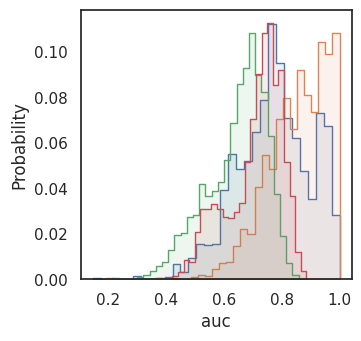

In [50]:
sb.histplot(x=dtc, stat='probability', alpha=0.1, element='step')
sb.histplot(x=rfc, stat='probability', alpha=0.1, element='step')
sb.histplot(x=dtr, stat='probability', alpha=0.1, element='step')
sb.histplot(x=rfr, stat='probability', alpha=0.1, element='step')

In [51]:
tmp = pd.DataFrame({'dtc': dtc, 'dtr': dtr, 'rfc': rfc, 'rfr': rfr})

In [52]:
tmp = tmp.melt()

In [53]:
px.histogram(tmp, histnorm='probability', opacity=0.25, color='variable')

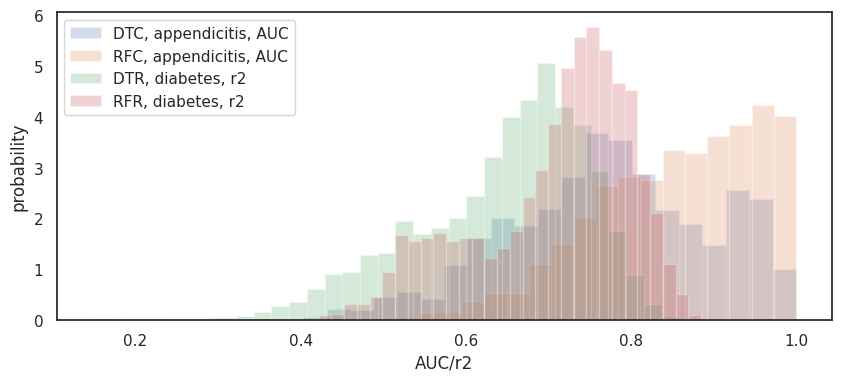

In [54]:
plt.figure(figsize=(10, 4))
plt.hist(dtc, alpha=0.25, label='DTC, appendicitis, AUC', density=1, bins=30, stacked=True)
plt.hist(rfc, alpha=0.25, label='RFC, appendicitis, AUC', density=1, bins=30, stacked=True)
plt.hist(dtr, alpha=0.25, label='DTR, diabetes, r2', density=1, bins=30, stacked=True)
plt.hist(rfr, alpha=0.25, label='RFR, diabetes, r2', density=1, bins=30, stacked=True)
plt.xlabel('AUC/r2')
plt.ylabel('probability')
plt.legend()